# Multi-Class Prediction of Cirrhosis Outcomes

# Overview 
## Your Goal: 
For this Episode of the Series, your task is to use a multi-class approach to predict the the outcomes of patients with cirrhosis. 
## Evaluation
Submissions are evaluated using the multi-class logarithmic loss.
## Submission File
for each `id` row in the set, you must predict probabilities of the three outcomes `Status_C`, `Status_CL`, and `Status_D`

In [127]:
! pip install imbalanced_learn

In [130]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
import numpy as np
import joblib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline

In [5]:
# import train data set 
df = pd.read_csv('train.csv')

In [6]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [7]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
df.describe

<bound method NDFrame.describe of         id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0        0     999  D-penicillamine  21532   M       N            N       N   
1        1    2574          Placebo  19237   F       N            N       N   
2        2    3428          Placebo  13727   F       N            Y       Y   
3        3    2576          Placebo  18460   F       N            N       N   
4        4     788          Placebo  16658   F       N            Y       N   
...    ...     ...              ...    ...  ..     ...          ...     ...   
7900  7900    1166  D-penicillamine  16839   F       N            N       N   
7901  7901    1492          Placebo  17031   F       N            Y       N   
7902  7902    1576  D-penicillamine  25873   F       N            N       Y   
7903  7903    3584  D-penicillamine  22960   M       N            Y       N   
7904  7904    1978  D-penicillamine  19237   F       N            N       N   

     Edema  Bilir

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [10]:
df.shape

(7905, 20)

In [11]:
df['Drug'].unique(), df['Ascites'].unique(), df['Hepatomegaly'].unique(), df['Spiders'].unique(), df['Edema'].unique()

(array(['D-penicillamine', 'Placebo'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['N', 'Y', 'S'], dtype=object))

In [12]:
df.Status.value_counts()

Status
C     4965
D     2665
CL     275
Name: count, dtype: int64

In [13]:
## the target that we are predicting is unbalanced. Most of the results are C (Alive) CL (Alive with Liver transplant) D (deceased).  

In [14]:
pd.crosstab(df.Status, df.Drug)

Drug,D-penicillamine,Placebo
Status,,
C,2405,2560
CL,151,124
D,1339,1326


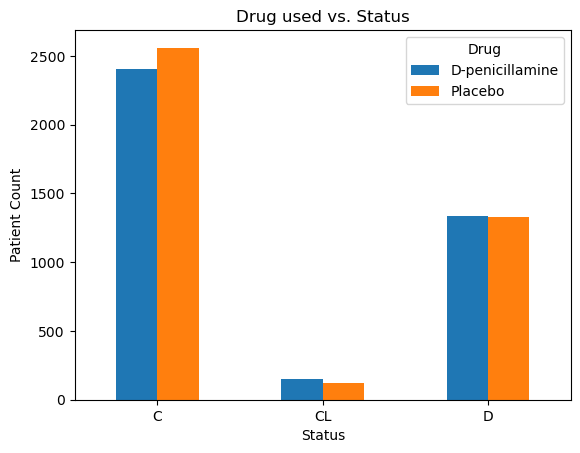

In [15]:
pd.crosstab(df.Status, df.Drug).plot(kind='bar')

plt.title('Drug used vs. Status')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0);

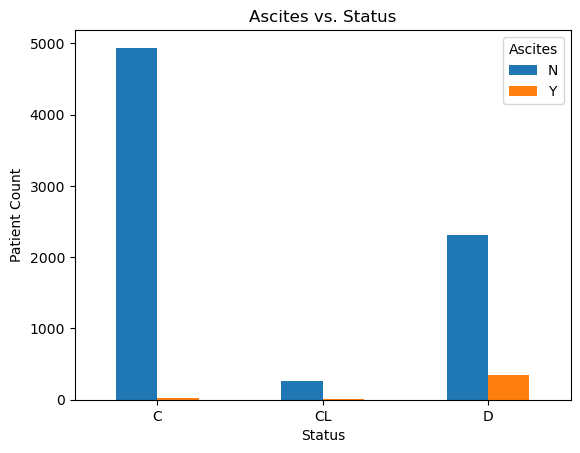

In [16]:
pd.crosstab(df.Status,df.Ascites).plot(kind='bar')
plt.title('Ascites vs. Status')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0);

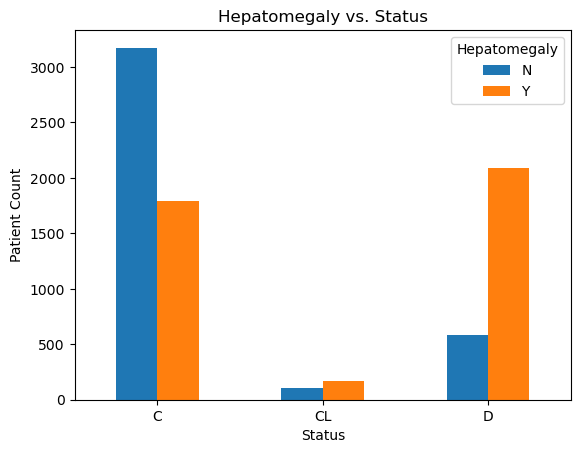

In [17]:
pd.crosstab(df.Status, df.Hepatomegaly).plot(kind='bar')

plt.title('Hepatomegaly vs. Status')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0);

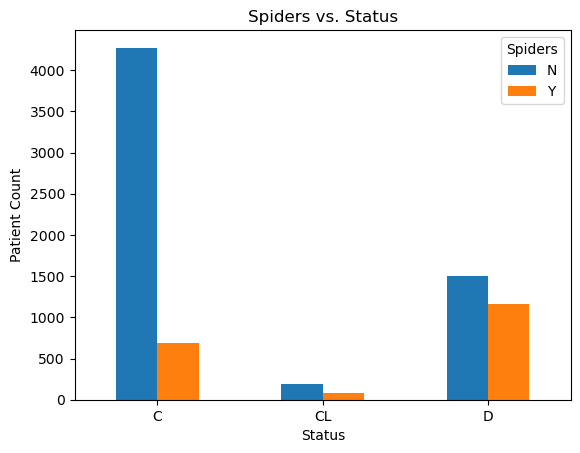

In [18]:
pd.crosstab(df.Status, df.Spiders).plot(kind='bar')

plt.title('Spiders vs. Status')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0);

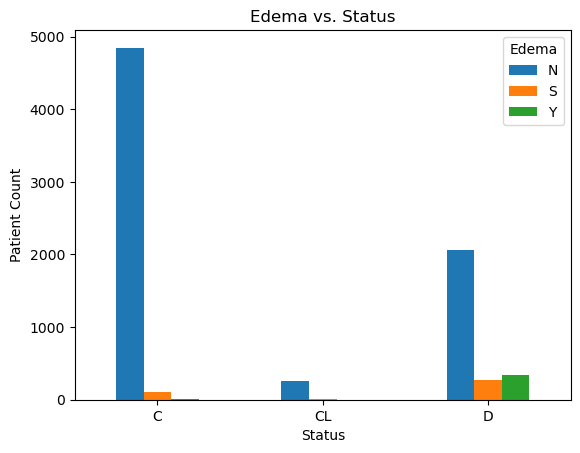

In [19]:
pd.crosstab(df.Status, df.Edema).plot(kind='bar')

plt.title('Edema vs. Status')
plt.ylabel('Patient Count')
plt.xticks(rotation = 0);

In [20]:
fig = px.histogram(df, x='Age',
                  color='Status',
                  title= 'Age and Status')
fig.show()

In [21]:
fig = px.histogram(df, x='Bilirubin',
                  color='Status',
                  title= 'Billiruben and Status',
                  nbins=20)
fig.show()

In [22]:
fig = px.histogram(df, x='Cholesterol',
                  color='Status',
                  title= 'Cholesterol and Status',
                  nbins=20)
fig.show()

In [23]:
fig = px.histogram(df, x='Albumin',
                  color='Status',
                  title= 'Albumen and Status',
                  nbins=20)
fig.show()

In [24]:
fig = px.histogram(df, x='Copper',
                  color='Status',
                  title= 'Copper and Status',
                  nbins=20)
fig.show()

In [25]:
fig = px.histogram(df, x='Alk_Phos',
                  color='Status',
                  title= 'Alk_Phos and Status',
                  nbins=20)
fig.show()

In [26]:
fig = px.histogram(df, x='SGOT',
                  color='Status',
                  title= 'SGOT and Status',
                  nbins=20)
fig.show()

In [27]:
fig = px.histogram(df, x='Tryglicerides',
                  color='Status',
                  title= 'Tryglicerides and Status',
                  nbins=20)
fig.show()

In [28]:
fig = px.histogram(df, x='Platelets',
                  color='Status',
                  title= 'Platelets and Status',
                  nbins=20)
fig.show()

In [29]:
fig = px.histogram(df, x='Prothrombin',
                  color='Status',
                  title= 'Prothrombin and Status',
                  nbins=20)
fig.show()

In [30]:
fig = px.bar(df, 
             x='Stage',
             y='Stage',
             color='Status',
             title= 'Stage and Status')
fig.show()

In [90]:
df.info

<bound method DataFrame.info of         id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0        0     999  D-penicillamine  21532   M       N            N       N   
1        1    2574          Placebo  19237   F       N            N       N   
2        2    3428          Placebo  13727   F       N            Y       Y   
3        3    2576          Placebo  18460   F       N            N       N   
4        4     788          Placebo  16658   F       N            Y       N   
...    ...     ...              ...    ...  ..     ...          ...     ...   
7900  7900    1166  D-penicillamine  16839   F       N            N       N   
7901  7901    1492          Placebo  17031   F       N            Y       N   
7902  7902    1576  D-penicillamine  25873   F       N            N       Y   
7903  7903    3584  D-penicillamine  22960   M       N            Y       N   
7904  7904    1978  D-penicillamine  19237   F       N            N       N   

     Edema  Bilirub

In [101]:
to_transform = ['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema']
num_cols_names = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos','SGOT']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('categorical', one_hot, to_transform)])



In [92]:
# encoded_drug = le.fit_transform(df['Drug'])
# df.drop('Drug',axis=1,inplace = True)
# df['encoded_drug'] = encoded_drug
# encoded_sex = le.fit_transform(df['Sex'])
# df.drop('Sex', axis = 1, inplace = True)
# df['encoded_sex'] = encoded_sex
# encoded_ascites = le.fit_transform(df['Ascites'])
# df.drop('Ascites', axis = 1, inplace =True)
# df['encoded_ascites'] = encoded_ascitesencoded_hepatomegaly = le.fit_transform(df['Hepatomegaly'])
# df.drop('Hepatomegaly', axis = 1, inplace = True)
# df['encoded_hepatomegaly'] = encoded_hepatomegaly
# encoded_spiders = le.fit_transform(df['Spiders'])
# df.drop('Spiders', axis=1, inplace = True)
# df['encoded_spiders'] = encoded_spiders
# encoded_edema = le.fit_transform(df['Edema'])
# df.drop('Edema', axis = 1, inplace = True)
# df['encoded_edema'] = encoded_edema 

In [102]:
le = LabelEncoder()

In [103]:
encoded_status = le.fit_transform(df['Status'])
df.drop('Status', axis = 1, inplace = True)
df['Status'] = encoded_status
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,1,21532,2,1,1,1,1,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,1,2574,2,19237,1,1,1,1,1,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,2,3428,2,13727,1,1,2,2,3,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,3,2576,2,18460,1,1,1,1,1,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,4,788,2,16658,1,1,2,1,1,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0


In [135]:
Models = {'Logistic Regression' : LogisticRegression(),
          # 'KNN' :KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(class_weight='balanced')}
# Function to score models 
def train_and_score(models, x_train,y_train,x_test,y_test):
    """
    Fits and evaluates given machine learning models. 
    models: dict of different scikit-learn machine learning models
    x_train: training daya (no Labels)
    y_train: training labels
    x_test: test data (no labels)
    y_test: test labels
    """
    # set random seed
    np.random.seed(9)
    # dict to keep model scores 
    model_scores = {}
    # loop through models 
    for name, model in models.items():
        pipeline= Pipeline([('transformer',transformer),('model',model)])   
        pipeline.fit(x_train,y_train)
        model_scores[name] = pipeline.score(x_test,y_test)
            
        # model.fit(x_train, y_train)
        # model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [136]:
np.random.seed(9)
x = df.drop('Status', axis = 1)
y = df['Status']
x_train,x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.2)

In [137]:
train_and_score(Models, x_train,y_train,x_test,y_test)

/Users/kolegraham/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'Logistic Regression': 0.7210626185958254,
 'Random Forest': 0.5977229601518027}

In [134]:
model = LogisticRegression()
pipeline= Pipeline([('transformer',transformer),('model',model)])
pipeline.fit(x_train,y_train)
pipeline.score(x_test,y_test)

/Users/kolegraham/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7210626185958254

In [98]:
y_preds = pipeline.predict(x_test)
print(classification_report(y_test, y_preds))

/Users/kolegraham/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1008
           1       0.00      0.00      0.00        69
           2       0.64      0.53      0.58       504

    accuracy                           0.72      1581
   macro avg       0.46      0.46      0.46      1581
weighted avg       0.68      0.72      0.70      1581



/Users/kolegraham/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kolegraham/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [151]:
model = RandomForestClassifier()# class_weight='balanced')
rf_pipeline= Pipeline([('transformer',transformer),('model',model)])
rf_pipeline.fit(x_train,y_train)
rf_pipeline.score(x_test,y_test)

0.7229601518026565

In [142]:
y_preds_rf = rf_pipeline.predict(x_test)
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71      1008
           1       0.10      0.35      0.15        69
           2       0.55      0.70      0.61       504

    accuracy                           0.62      1581
   macro avg       0.51      0.55      0.49      1581
weighted avg       0.73      0.62      0.66      1581



In [147]:
rf_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'model', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__categorical', 'transformer__categorical__categories', 'transformer__categorical__drop', 'transformer__categorical__dtype', 'transformer__categorical__feature_name_combiner', 'transformer__categorical__handle_unknown', 'transformer__categorical__max_categories', 'transformer__categorical__min_frequency', 'transformer__categorical__sparse', 'transformer__categorical__sparse_output', 'model__bootstrap', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model

In [139]:
model_scores = train_and_score(models = Models, 
                               x_train = x_train,
                               x_test = x_test,
                               y_train = y_train,
                               y_test = y_test)
model_scores

/Users/kolegraham/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



{'Logistic Regression': 0.7210626185958254,
 'Random Forest': 0.5977229601518027}

In [152]:
rs_rf_grid = {'n__estimators': np.arange(10,10000,50),
             'max__depth': [None, 3, 5, 10],
             'class__weights' : ['balanced'],
             'min__samples__split': np.arange(2,20,2),
             'min__samples__leaf': np.arange(1,20,2)}
rs_log_grid = {'C': np.logspace(-4,4,20),
              'solver' : ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
          

In [153]:
## Currently working here!! 
%%time
# tune Hyperparameters
np.random.seed(9)
rs_rf = RandomizedSearchCV(rf_pipeline,
                       param_distributions = rs_rf_grid,
                       cv = 5,
                       n_iter = 20,
                       verbose = True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: Invalid parameter 'n' for estimator Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['Drug', 'Sex', 'Ascites',
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema'])])),
                ('model', RandomForestClassifier())]). Valid parameters are: ['memory', 'steps', 'verbose'].

Output of above cell:
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 40min 51s
Wall time: 41min 6s

In [ ]:
# rs_rf.best_params_

Output of above cell:
{'n_estimators': 6710,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [ ]:
rf = Pipeline([('transformer',transformer),('model',RandomForestClassifier(n_estimators = 6710,
                                                                                min_samples_split = 2,
                                                                                min_samples_leaf = 3,
                                                                                max_depth = 10))])
# rf = RandomForestClassifier(n_estimators = 6710,
#                             min_samples_split = 2,
#                             min_samples_leaf = 3,
#                             max_depth = 10)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)                            

0.7223276407337128

In [ ]:
# rs_rf.score(x_test, y_test)

Output of above cell:
0.8197343453510436

In [ ]:
%%time 
# tune hyperparameters 
np.random.seed(9)
rs_log = RandomizedSearchCV(LogisticRegression(),
                            param_distributions = rs_log_grid,
                            cv = 5, 
                            n_iter = 100, 
                            verbose = True)
rs_log.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/kolegraham/Desktop/kaggle_challenges/env/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/kolegraham/Desktop/kaggle_challenges/env/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/kolegraham/Desktop/kaggle_challenges/env/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/kolegraham/Desktop/kaggle_challenges/env/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/kolegraham/Desktop/kaggle_challenges/env/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/Users/kolegraham/Desktop

CPU times: user 5min 42s, sys: 9.45 s, total: 5min 51s
Wall time: 15min 12s


/Users/kolegraham/Desktop/kaggle_challenges/env/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   verbose=True)

In [ ]:
rs_log.best_params_

{'solver': 'newton-cg', 'C': 0.004832930238571752}

Output of above cells: 
{'solver': 'newton-cholesky', 'C': 0.03359818286283781}

In [ ]:
rs_log.score(x_test, y_test)

0.7862112586970272

output of above cell: 0.7906388361796332

In [ ]:
# file_name = 'log_reg.joblib'
# joblib.dump(rs_log, file_name)

In [ ]:
# file_name = 'random_forest.joblib'
# joblib.dump(rs_rf, file_name)

In [ ]:
# log_model = joblib.load('log_reg.joblib')

KeyError: 173

In [ ]:
# rf_model = joblib.load('random_forest.joblib')

In [ ]:
y_preds_log = rs_log.predict(x_test)
y_proba_log = rs_log.predict_proba(x_test)

In [ ]:
y_preds_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html for creating a multiclass Roc curve

In [ ]:
print(y_proba_rf)

[[0.96010865 0.00576707 0.03412428]
 [0.9552213  0.00589195 0.03888675]
 [0.04288802 0.02848408 0.9286279 ]
 ...
 [0.87657172 0.02099655 0.10243173]
 [0.20978839 0.13749995 0.65271166]
 [0.88582117 0.01398807 0.10019076]]


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test_IDs = test['id']

In [ ]:
encoded_drug = le.fit_transform(test['Drug'])
test.drop('Drug',axis=1,inplace = True)
test['encoded_drug'] = encoded_drug
encoded_sex = le.fit_transform(test['Sex'])
test.drop('Sex', axis = 1, inplace = True)
test['encoded_sex'] = encoded_sex
encoded_ascites = le.fit_transform(test['Ascites'])
test.drop('Ascites', axis = 1, inplace =True)
test['encoded_ascites'] = encoded_ascites
encoded_hepatomegaly = le.fit_transform(test['Hepatomegaly'])
test.drop('Hepatomegaly', axis = 1, inplace = True)
test['encoded_hepatomegaly'] = encoded_hepatomegaly
encoded_spiders = le.fit_transform(test['Spiders'])
test.drop('Spiders', axis=1, inplace = True)
test['encoded_spiders'] = encoded_spiders
encoded_edema = le.fit_transform(test['Edema'])
test.drop('Edema', axis = 1, inplace = True)
test['encoded_edema'] = encoded_edema 

KeyError: 'Drug'

In [ ]:
y_pred_proba = rf.predict_proba(test)
assert y_pred_proba.shape == (test.shape[0],3)
submission_labels = ["Status_C", "Status_CL", "Status_D"]

submission = pd.DataFrame({'id': test_IDs, **dict(zip(submission_labels, y_pred_proba.T))})
submission.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.702913,0.041990,0.255098
1,7906,0.736162,0.075619,0.188219
2,7907,0.126707,0.061058,0.812235
3,7908,0.902117,0.010246,0.087636
4,7909,0.704401,0.066533,0.229066


In [ ]:
submission.to_csv('Cirrhosis_predictions.csv', index = False)